In [3]:
import pandas as pd
import seaborn as sns
import folium
#Reading table from pandas directly
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]

#Eliminate rows with Not Assigned
df1= df[~df.Borough.str.contains('Not assigned')]
df1.reset_index(inplace=True,drop=True)

#read coordinates from CSV
coordinates=pd.read_csv('https://cocl.us/Geospatial_data')

#merge both dataset using inner join
df_all = pd.merge(df1,coordinates,on='Postal Code')
df_all.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


# Scatter plot of coordinates 


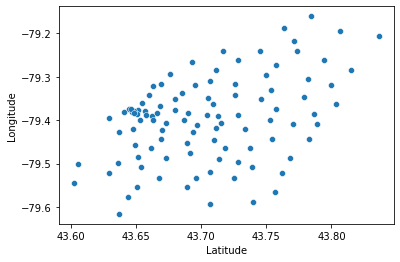

In [17]:
import numpy as np
sns.scatterplot(data=df_all,x='Latitude',y='Longitude')
x=df_all['Latitude']
y=df_all['Longitude']
X=np.array([x,y]).T


# Kmeans segmentation of neighbourhoods

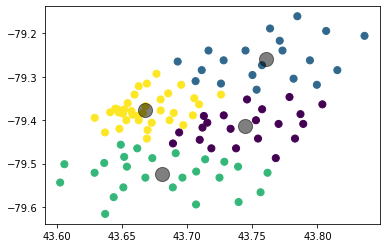

In [19]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Create Folium map with the clusters on neighbourhoods

In [21]:
from folium import plugins
latitude=43.651070
longitude=-79.347015
# let's start again with a clean copy of the map of San Francisco
toronto_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(toronto_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_all['Latitude'], df_all['Longitude'], df_all['Neighbourhood']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
toronto_map